# Find the accuracy mse,mae using Decision Tree,KNN & Logistic Regression algorithm.Create a dataframe & make a barplot using these values

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
df=pd.read_excel('shoe (1).xlsx')
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


In [2]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['class(y)']=le.fit_transform(df['class(y)'])
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [7]:
x=df.drop('class(y)',axis=1)
y=df[['class(y)']]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=5)

# Decision Tree Algorithm

In [8]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [9]:
ypred=dt.predict(xtest)
ypred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [10]:
from sklearn import metrics
import numpy as np
y_test=np.ravel(ytest)
table=pd.DataFrame({'Actual': y_test,'Predicted':ypred})
table.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [11]:
dt_accuracy=dt.score(xtest,ytest)
dt_accuracy

0.9166666666666666

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
dt_mse=mean_squared_error(ytest,ypred)
dt_mse

0.08333333333333333

In [13]:
dt_mae=mean_absolute_error(ytest,ypred)
dt_mae

0.08333333333333333

# KNN Classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier
kmn=KNeighborsClassifier(n_neighbors=10)
kmn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=10)

In [17]:
ypredk=kmn.predict(xtest)
ypredk

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [18]:
ytestk=np.ravel(ytest)
tablek=pd.DataFrame({'Actual': ytestk, 'Predicted': ypredk})
tablek.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [19]:
kmn_accuracy=kmn.score(xtest,ytest)
kmn_accuracy

0.9166666666666666

In [20]:
kmn_mse=mean_squared_error(ytest,ypredk)
kmn_mse

0.08333333333333333

In [21]:
kmn_mae=mean_absolute_error(ytest,ypredk)
kmn_mae

0.08333333333333333

# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
ypred1=lo.predict(xtest)
ypred1

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1])

In [26]:
ytest1=np.ravel(ytest)
tabel1=pd.DataFrame({'Actual':ytest1,'Predicted': ypred1})
tabel1.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,1,0
8,1,1
9,0,0


In [27]:
lo_accuracy=lo.score(xtest,ytest)
lo_accuracy

0.9166666666666666

In [28]:
lo_mse=mean_squared_error(ytest,ypred1)
lo_mse

0.08333333333333333

In [29]:
lo_mae=mean_absolute_error(ytest,ypred)
lo_mae

0.08333333333333333

# Dataframe & Barplot using these values

In [30]:
models = ['Decision Tree','KNN','Logistic Regression']
mae_scores=[dt_mae,kmn_mae,lo_mae]
mse_scores=[dt_mse,kmn_mse,lo_mse]
accuracy_scores=[dt_accuracy,kmn_accuracy,lo_accuracy]
data={'Model': models,'MAE': mae_scores,'MSE':mse_scores,'Accuracy':accuracy_scores}
new_df=pd.DataFrame(data)
new_df

,Model,MAE,MSE,Accuracy
0,Decision Tree,0.083333,0.083333,0.916667
1,KNN,0.083333,0.083333,0.916667
2,Logistic Regression,0.083333,0.083333,0.916667


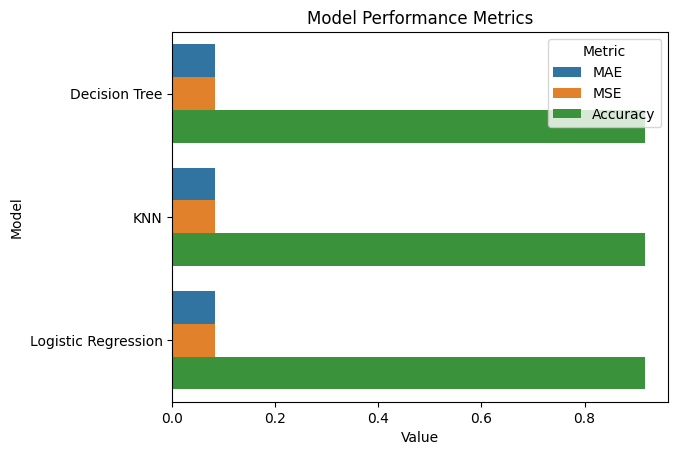

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
df_plot=new_df.melt('Model',var_name='Metric',value_name='Value')
sns.barplot(x='Value',y='Model',hue='Metric',data=df_plot)
plt.title('Model Performance Metrics')
plt.xlabel('Value')
plt.ylabel('Model')
plt.show()